# Generating Housing Price and Loan Probability Data

#####    Author: Ibad Rather, ibad.rather.ir@gmail.com



<h4>
I want to generate housing prics and loan probability (getting a loan on that house) data based on a mathematical relation.


I am doing this because I want to do this to test various models for multi-variate (inputs) and multiple targets (outputs) type of data. 

(Also for fun and to see how much realistic I am able to make this data). 
</h4>

- #### Input Variables:
    - num_rooms: Number of rooms
    - num_floors: Number of floors
    - num_bathrooms: Number of bathrooms
    - size: Size of house in square foot
    - age: How long ago was the house build
    - crime_rate: Crime rate around the place
    - garden_size: Garden Size of the house. No garden will have value = 0.0
    - median_income: This is a variable defining median income of the neighbourhood: i.e. How many rich people live there.

- #### Outputs:
    - price: Price of the house
    - loan_prob: Probability to get a Loan


- ### Relationship between these input variables and price

    - #### *num_rooms + num_floors + num_bathrooms + size - age - crime_rate + garden_size = price*

- ### Relationship between these input variables and loan_probability

    - #### *median_income - age - crime_rate = loan_prob*

- ##### NOTE:
    - -ive means an inverse relationship
    - +ive means a direct relationships

Actual formula is in the code and is based on just intuition and hit and trial

In [18]:
import numpy as np
import numpy.random as rand
import pandas as pd
import pickle

In [33]:
def gen_housing_data(n=10000):
    ## Multi-variate-Inputs
    # Between 1 and 20 rooms
    num_rooms = rand.randint(1, 21, n)  

    # Between 1 and 3 Floors
    num_floors = rand.randint(1, 4, n)  

    # Between 2 and 8 bathrooms
    num_bathrooms = rand.randint(2, 9, n)
    
    # Size of the house: it will depend on num_of_rooms, num_floors and num_bathrooms
    size = (num_floors + num_rooms + num_bathrooms) * 300

    # Age of the house from 1 to 80
    age = rand.randint(1, 81, n)

    # Crime rate in the neighbourhood
    crime_rate = rand.rand(n)

    # Garden Size: sqauare feet
    garden_size = rand.randint(1, 3000, n)
    garden_size[garden_size < 100] = 0

    # Median Early Incone: Euros -20k to 250k
    median_income = rand.randint(20e3,250e3, n)

    ## Outputs
    # Price: Let's define a relationship between these inputs and price
    # a, b, c, d and e are factors or weights to affect the price
    a = 30e3    # Weight for num_rooms, num_floors and num_bathrooms
    b = 30      # Weight for garden and house size
    c = 2000     # Weight for house age
    d = 50e3    # 
    e = 2
    price = (num_rooms + num_floors + num_bathrooms)*a + (size + garden_size)*b - (age * c) - (crime_rate * d) + (median_income * e)

    # Loan Probability
    f = 5       # Median Income weight
    g = 2      # Age Weight
    h = 7       # Crime Rate Weight
    loan_prob = (median_income * f) - (age * g) - (crime_rate * h)
    loan_prob = loan_prob / np.max(loan_prob)
    # Clamping minimum and maximum load probability
    loan_prob[loan_prob > 0.95] = 0.95
    loan_prob[loan_prob < 0.05] = 0.05

    # Converting this to a Pandas Dataframe
    dataset = pd.DataFrame(
        dict(
            num_rooms = num_rooms,
            num_floors = num_floors,
            num_bathrooms =num_bathrooms,
            size = size,
            age = age,
            crime_rate = crime_rate,
            garden_size = garden_size,
            median_income = median_income,
            price = price,
            loan_prob = loan_prob
        )
    )

    # Save to csv file
    dataset_name = "housing_dataset_fabricated.csv"
    dataset.to_csv(dataset_name, index=False)
    return dataset

In [34]:
np.random.seed(51)
dataset = gen_housing_data(n=100)

In [35]:
dataset

,num_rooms,num_floors,num_bathrooms,size,age,crime_rate,garden_size,median_income,price,loan_prob
0,6,3,5,4200,73,0.260319,206,204615,8.023941e+05,0.824275
1,1,2,4,2100,42,0.712777,394,52563,2.703072e+05,0.211705
2,10,3,4,5100,65,0.197236,480,184204,9.059462e+05,0.742053
3,6,1,3,3000,3,0.412594,0,95010,5.533903e+05,0.382788
4,17,3,7,8100,34,0.011147,1987,236946,1.517945e+06,0.950000
...,...,...,...,...,...,...,...,...,...,...
95,18,1,2,6300,40,0.525200,2465,155095,1.096880e+06,0.624811
96,11,1,3,4500,78,0.008656,781,42462,5.369212e+05,0.170954
97,2,1,7,3000,62,0.085240,1769,197467,7.097420e+05,0.795495
98,10,1,7,5400,37,0.684683,2338,189624,1.043154e+06,0.763932


## Exporatory Data Analysis

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams["figure.figsize"] = (12,8)

### Checking Data Correlations

In [37]:
dataset.corr()

,num_rooms,num_floors,num_bathrooms,size,age,crime_rate,garden_size,median_income,price,loan_prob
num_rooms,1.000000,0.200181,-0.183670,0.918019,0.092785,0.095059,0.108242,0.079634,0.785337,0.076628
num_floors,0.200181,1.000000,0.108501,0.382482,0.148999,0.015205,-0.034072,0.026195,0.298929,0.025620
num_bathrooms,-0.183670,0.108501,1.000000,0.192575,0.056749,0.046819,0.035746,-0.157068,0.065617,-0.158509
size,0.918019,0.382482,0.192575,1.000000,0.131131,0.109217,0.110293,0.024736,0.816358,0.021282
age,0.092785,0.148999,0.056749,0.131131,1.000000,-0.044481,0.098503,-0.022113,-0.061268,-0.019602
crime_rate,0.095059,0.015205,0.046819,0.109217,-0.044481,1.000000,-0.134927,-0.052444,0.004795,-0.057410
garden_size,0.108242,-0.034072,0.035746,0.110293,0.098503,-0.134927,1.000000,0.057512,0.203012,0.052980
median_income,0.079634,0.026195,-0.157068,0.024736,-0.022113,-0.052444,0.057512,1.000000,0.565110,0.999481
price,0.785337,0.298929,0.065617,0.816358,-0.061268,0.004795,0.203012,0.565110,1.000000,0.561419
loan_prob,0.076628,0.025620,-0.158509,0.021282,-0.019602,-0.057410,0.052980,0.999481,0.561419,1.000000


### Regression Plots

<AxesSubplot:xlabel='size', ylabel='price'>

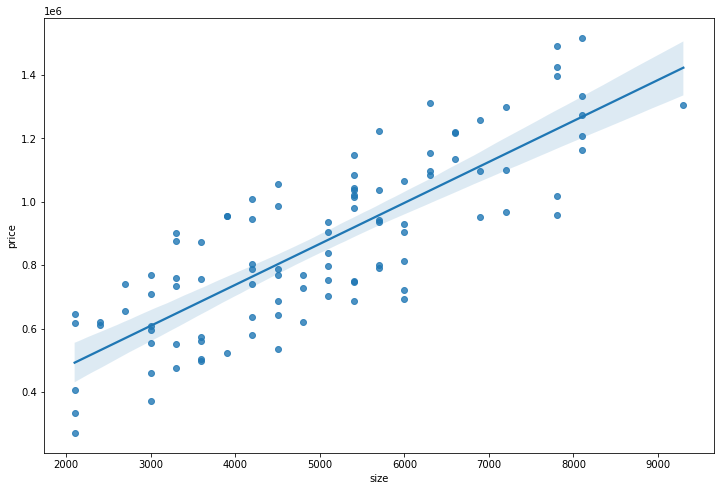

In [38]:
sns.regplot(x="size", y="price", data=dataset)

<AxesSubplot:xlabel='age', ylabel='price'>

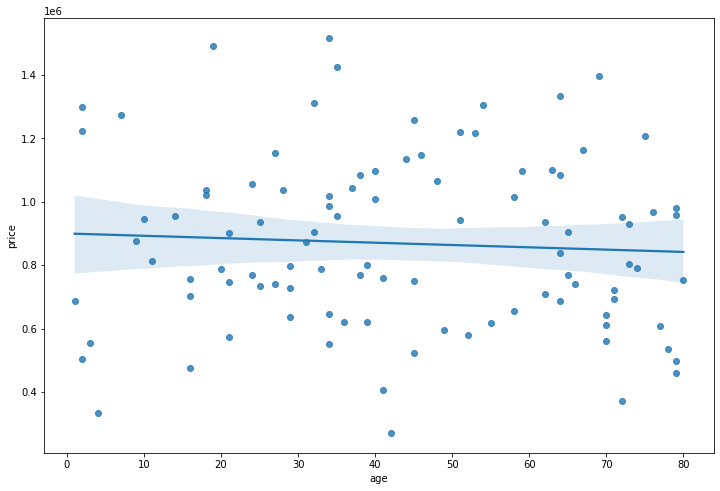

In [39]:
sns.regplot(x="age", y="price", data=dataset)

<AxesSubplot:xlabel='crime_rate', ylabel='price'>

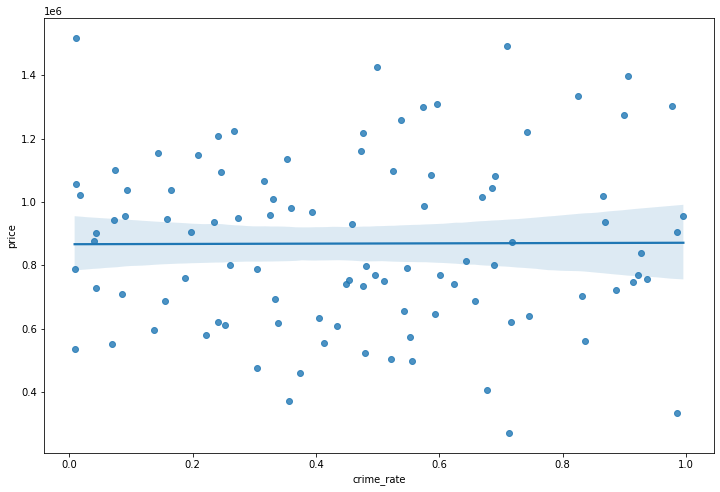

In [40]:
sns.regplot(x="crime_rate", y="price", data=dataset)

<AxesSubplot:xlabel='median_income', ylabel='price'>

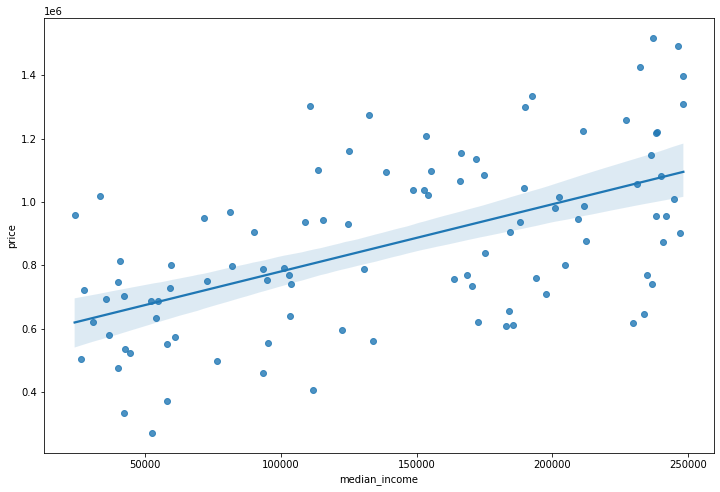

In [41]:
sns.regplot(x="median_income", y="price", data=dataset)

<AxesSubplot:xlabel='num_floors', ylabel='price'>

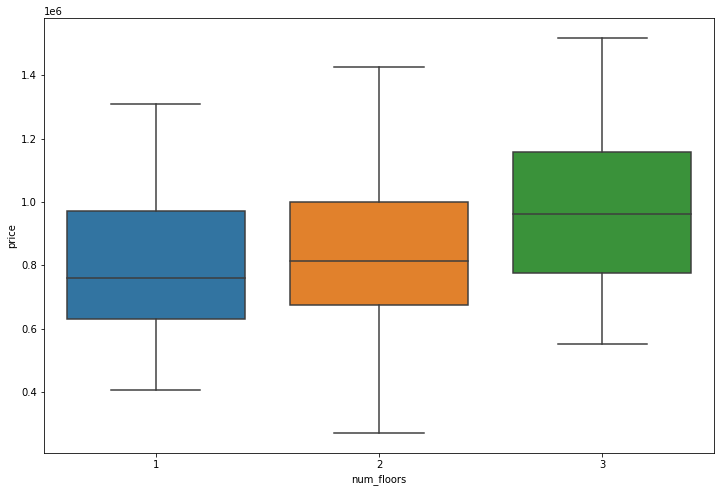

In [42]:
sns.boxplot(x="num_floors", y="price", data=dataset)

<AxesSubplot:xlabel='num_floors', ylabel='price'>

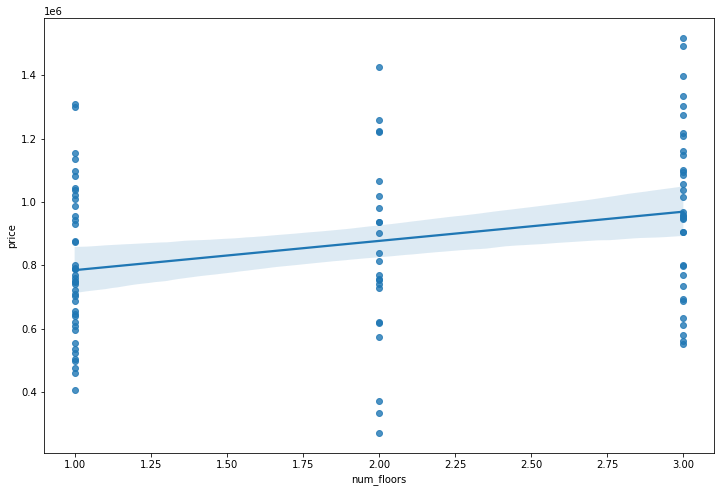

In [43]:
sns.regplot(x="num_floors", y="price", data=dataset)

<AxesSubplot:xlabel='num_floors', ylabel='price'>

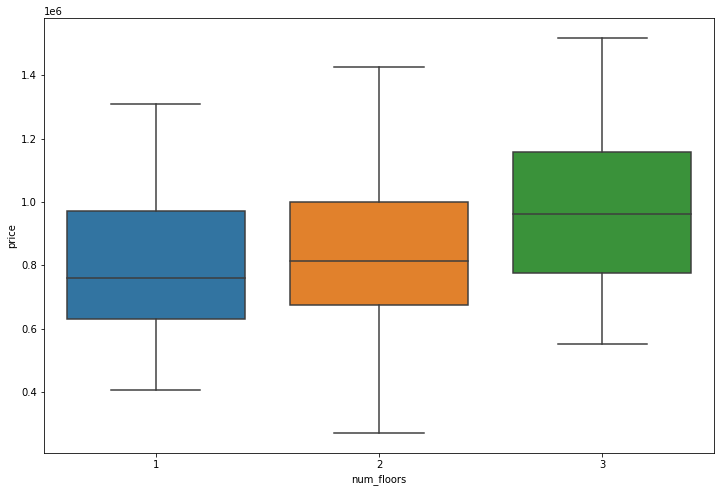

In [44]:
sns.boxplot(x="num_floors", y="price", data=dataset)

<AxesSubplot:xlabel='garden_size', ylabel='price'>

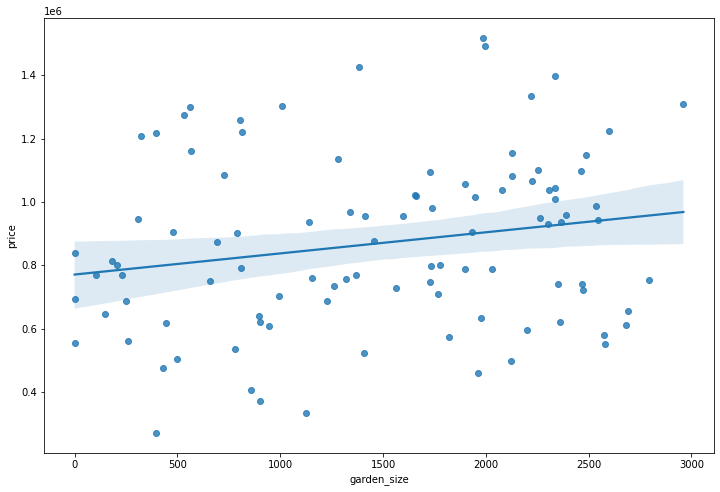

In [45]:
sns.regplot(x="garden_size", y="price", data=dataset)

<AxesSubplot:xlabel='price', ylabel='loan_prob'>

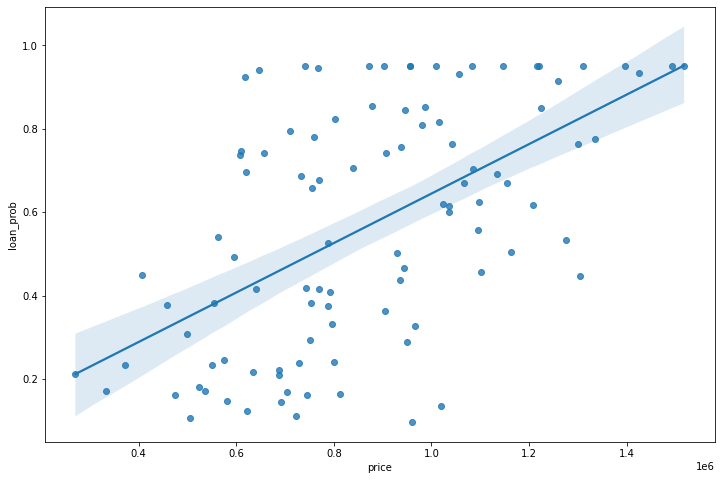

In [46]:
sns.regplot(x="price", y="loan_prob", data=dataset)

## Correlation and Causation

- Correlation: a measure of the extent of interdependence between variables.

- Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

    1: Total positive linear correlation.
    0: No linear correlation, the two variables most likely do not affect each other.
    -1: Total negative linear correlation.